### Create a CNN model for image classification using Keras

In [39]:
# import modules

import os
from skimage.io import imread
import skimage
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import cv2


from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras import backend as K

In [2]:
ROOT_PATH = 'D:/AI/Data/bio_medical'

training_path = os.path.join(ROOT_PATH, 'training')
testing_path = os.path.join(ROOT_PATH, 'testing')

def load_data(data_directory):
    d1 = []
    d2 = []
    d3 = []
    images_cv2 = []
    labels_cv2 = []
    image_diretory = []

    for d in os.listdir(training_path):
        d1_path = d
        d1.append(d1_path)

    for x in d1:
        for d in os.listdir(os.path.join(training_path, x)):
            d2_path = d
            (d2.append(d2_path))

    for x1 in d1:
        for x2 in d2:
            if os.path.isdir(os.path.join(training_path, x1, x2)):
                for d in os.listdir(os.path.join(training_path, x1, x2)):
                    d3_path = d
                    (d3.append(d3_path))
                
    for x1 in d1:
        for x2 in d2:
            for x3 in d3:
                if os.path.isdir(os.path.join(training_path, x1, x2,x3)):                
                    for d in os.listdir(os.path.join(training_path, x1, x2, x3)):
                        image_path = os.path.join(training_path, x1, x2, x3)
                        image_diretory.append(image_path)   
                    

    for y in image_diretory:
        for f in os.listdir(y):
            if f.endswith('.png'):
                img_cv2 = cv2.imread(os.path.join(y,f))
                (b, g, r)=cv2.split(img_cv2)
                img_cv2=cv2.merge([r,g,b])
                images_cv2.append(img_cv2)
                if 'positive' in os.path.join(y,f):
                    l_cv2 = 0
                    labels_cv2.append(l_cv2)
                elif 'negative' in os.path.join(y,f):
                    l_cv2 = 1
                    labels_cv2.append(l_cv2)
    
    return images_cv2, labels_cv2



In [3]:
images_cv2, labels_cv2 = load_data(training_path)

In [9]:

from skimage import transform

images_cv2 = [transform.resize(image, (56, 56)) for image in images_cv2]

images_cv2 = np.array(images_cv2)

from skimage.color import rgb2gray

# Convert `images56` to an array
images_bw = np.array(images_cv2)

# Convert `images56` to grayscale
images_bw = rgb2gray(images_bw)

In [20]:
# print images and label shape

#print(images_bw.shape)
#print(len(labels_cv2))
#print(type(labels_cv2))

image_labels = np.asarray(labels_cv2)

print(type(image_labels))

<class 'numpy.ndarray'>


In [21]:
# get the count of unique values of classes
# total 8359 valus : 0 - 1755
#                    1 - 6604 

unique_elements, counts_elements = np.unique(image_labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [1755 6604]]


In [47]:
# split the data into training, validation and testing datasets

from keras.utils import to_categorical
image_labels_cat = to_categorical(image_labels)

from sklearn.model_selection import train_test_split

X_train, X_valtest, y_train, y_valtest = train_test_split(images_bw, image_labels_cat, test_size = 0.3, random_state = 42)

# split the valtest data into validation and test datasets

X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size = 0.5, random_state = 40)

In [48]:
print(X_train.shape)
print(y_train.shape)
#print(X_valtest.shape)
#print(y_valtest.shape)
print('\n')
print(X_val.shape)
print(y_val.shape)

print('\n')
print(X_test.shape)
print(y_test.shape)


(5851, 56, 56)
(5851, 2)


(1254, 56, 56)
(1254, 2)


(1254, 56, 56)
(1254, 2)


In [50]:
# dimensions of our images.
img_width, img_height = 56, 56

epochs = 50
batch_size = 16

input_shape = (img_width, img_height, 1)

# create a function for classification
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
  


In [51]:
X_train = X_train.reshape(-1,56, 56, 1)   #Reshape for CNN -  should work!!
X_val = X_val.reshape(-1,56, 56, 1)
X_test = X_test.reshape(-1,56, 56, 1)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(X_test, y_test))
  
#model.evaluate(X_test, y_test)


Instructions for updating:
Use tf.cast instead.
Train on 5851 samples, validate on 1254 samples
Epoch 1/50
5851/5851 [==============================] - 55s 9ms/step - loss: 0.3052 - acc: 0.8735 - val_loss: 0.0086 - val_acc: 1.0000
Epoch 2/50
5851/5851 [==============================] - 51s 9ms/step - loss: 0.0632 - acc: 0.9880 - val_loss: 1.0075e-05 - val_acc: 1.0000
Epoch 3/50
5851/5851 [==============================] - 52s 9ms/step - loss: 0.0404 - acc: 0.9942 - val_loss: 9.3107e-06 - val_acc: 1.0000
Epoch 4/50
5851/5851 [==============================] - 53s 9ms/step - loss: 0.0470 - acc: 0.9934 - val_loss: 3.0313e-07 - val_acc: 1.0000
Epoch 5/50
5851/5851 [==============================] - 53s 9ms/step - loss: 0.0270 - acc: 0.9967 - val_loss: 0.0445 - val_acc: 0.9864
Epoch 6/50
5851/5851 [==============================] - 52s 9ms/step - loss: 0.0247 - acc: 0.9974 - val_loss: 1.6324e-07 - val_acc: 1.0000
Epoch 7/50
5851/5851 [==============================] - 52s 9ms/step - loss: 0

Text(0.5, 1.0, 'Accuracy Curves')

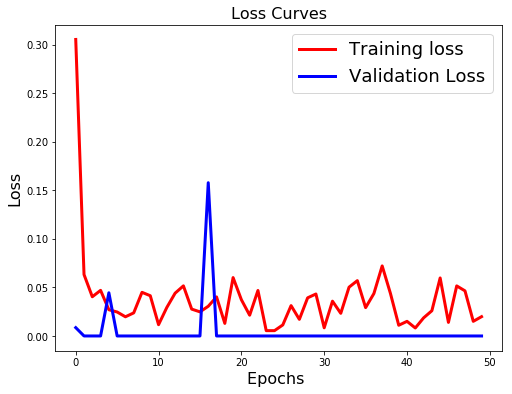

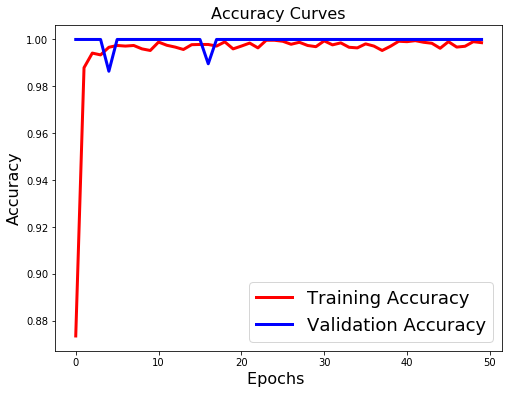

In [52]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: multilabel-indicator format is not supported

In [58]:
y_pred = model.predict_proba(X_test)

In [59]:
y_pred

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)